In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<Axes: >

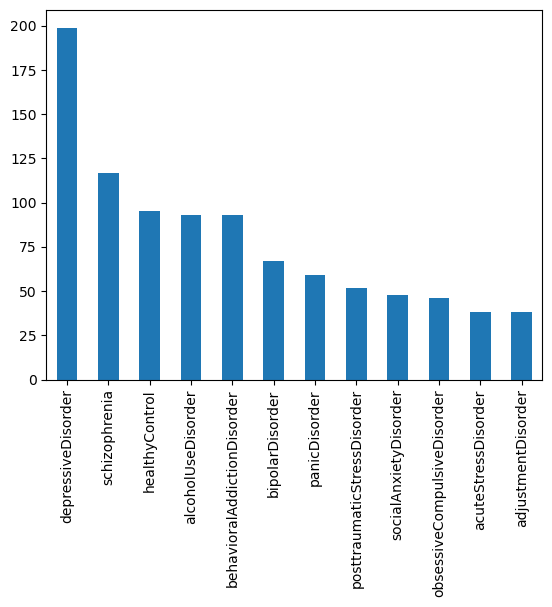

In [8]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

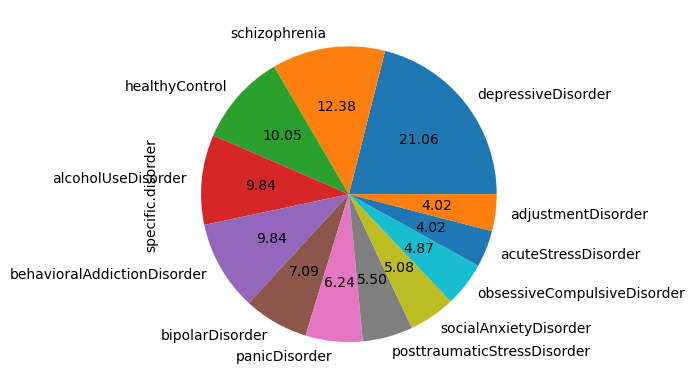

In [9]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [10]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'healthyControl':7,
    'obsessiveCompulsiveDisorder':8, 
    'panicDisorder':9,
    'posttraumaticStressDisorder':10, 
    'schizophrenia':11,
    'socialAnxietyDisorder':12
})

In [11]:
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,1,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,1,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,1,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,1,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,12,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,12,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,12,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,12,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [12]:
# Generating a correlation matrix
corr = eegDatasetCleaned.corr()

<Axes: >

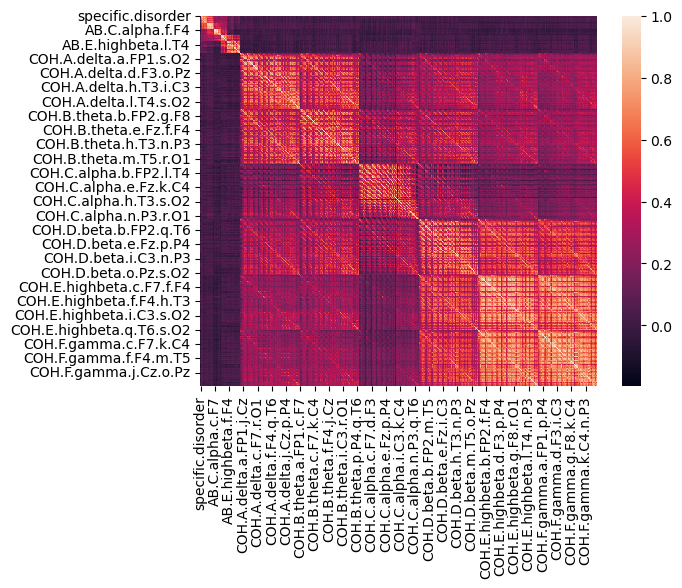

In [13]:
import seaborn as sns

# Generating a correlation heatmap to visually observe best correlations
sns.heatmap(corr)

In [14]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [15]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Handling Imbalanced Dataset
# SMOTE (Synthetic Minority Oversampling Technique) will be used as it helps with oversampling the examples
# in the minority class.

# Select random data from the minority class.
# Calculate the Euclidean distance between the random data and its k nearest neighbors.
# Multiply the difference with a random number between 0 and 1. Then, add the result to the minority class as a synthetic sample.
# Repeat the procedure until the expected proportion of minority class is met.

# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
xSmote, ySmote = resample.fit_resample(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'])

In [16]:
# Prints information about the EEG training smote dataset.
xSmote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Columns: 1140 entries, AB.A.delta.a.FP1 to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140)
memory usage: 20.8 MB


In [17]:
# Prints information about the EEG true smote dataset.
ySmote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2388 entries, 0 to 2387
Series name: specific.disorder
Non-Null Count  Dtype
--------------  -----
2388 non-null   int64
dtypes: int64(1)
memory usage: 18.8 KB


In [18]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRAINING DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG training dataset shape after smote: \n', xSmote.shape)


 EEG TRAINING DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG training dataset shape after smote: 
 (2388, 1140)


In [19]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG true value dataset shape after smote: \n', ySmote.shape)


 EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG true value dataset shape after smote: 
 (2388,)


<Axes: >

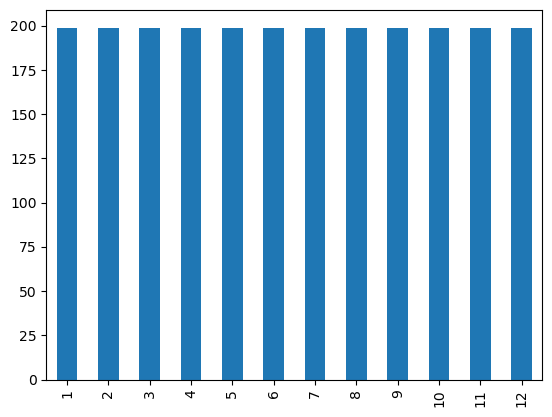

In [20]:
# Creating a visual plot to observe the y values after smote applied.
ySmote.value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

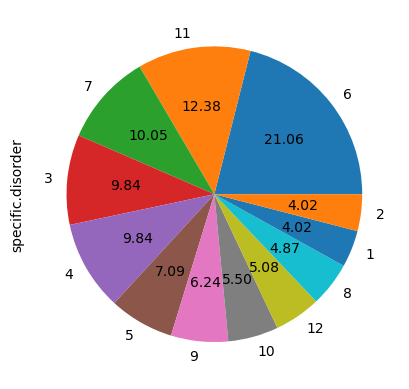

In [21]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [22]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(xSmote, ySmote, test_size=0.3, random_state=42)

In [27]:
import optuna
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define hyperparameters
    md = trial.suggest_int('max_depth', 2, 64)
    mi = trial.suggest_int('min_inst', 1, 32)

    # Create and train the model
    tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf=mi, random_state=42)
    tree.fit(X_train, y_train)

    # Evaluate the model
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [28]:
# Creating and running our optimization
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2023-08-23 18:54:42,053] A new study created in memory with name: no-name-da38dab2-f20d-41a4-99b2-467e9e4c5d20
[I 2023-08-23 18:54:43,680] Trial 0 finished with value: 0.34449093444909346 and parameters: {'max_depth': 10, 'min_inst': 22}. Best is trial 0 with value: 0.34449093444909346.
[I 2023-08-23 18:54:45,187] Trial 1 finished with value: 0.37517433751743373 and parameters: {'max_depth': 40, 'min_inst': 16}. Best is trial 1 with value: 0.37517433751743373.
[I 2023-08-23 18:54:46,462] Trial 2 finished with value: 0.32357043235704325 and parameters: {'max_depth': 15, 'min_inst': 32}. Best is trial 1 with value: 0.37517433751743373.
[I 2023-08-23 18:54:47,743] Trial 3 finished with value: 0.32357043235704325 and parameters: {'max_depth': 18, 'min_inst': 32}. Best is trial 1 with value: 0.37517433751743373.
[I 2023-08-23 18:54:49,524] Trial 4 finished with value: 0.4755927475592748 and parameters: {'max_depth': 33, 'min_inst': 5}. Best is trial 4 with value: 0.4755927475592748.
[I 2

In [29]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'max_depth': 59, 'min_inst': 1}
Best RMSE: 0.5230125523012552


In [23]:
from sklearn import tree

# Importing the decision tree api and setting a default model with decision tree configurations.
model = tree.DecisionTreeClassifier(max_depth=59)

>1 mean=0.5293 se=0.012
>2 mean=0.5347 se=0.008
>3 mean=0.5366 se=0.006
>4 mean=0.5396 se=0.005
>5 mean=0.5347 se=0.004


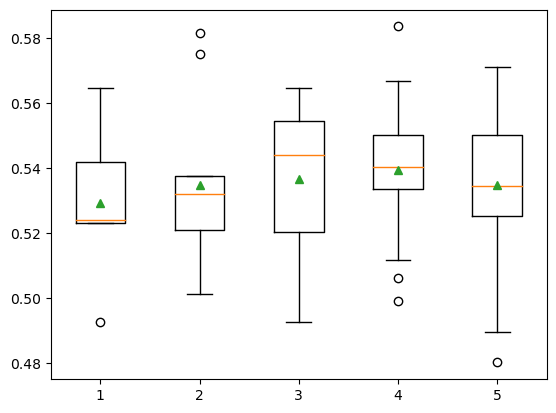

In [24]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn import linear_model
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from matplotlib import pyplot
 
# Function to evaluate model performance with number of repeats
def evaluate_model(xSmote, ySmote, repeats):
    # Preparation for cross validation procedure
    # The splits determines how the data is split into training and testing so as this is set to 5 folds 20% will be kept for testing and 80% for training
    # The repeats is set to 10 to get 
    cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=42)
    
    # Issue converging with max number of iterations with link to - https://scikit-learn.org/stable/modules/preprocessing.html
    model = tree.DecisionTreeClassifier(max_depth=59)
   
    # Below the variable contains the results from the cross validation score and returns them to be processed further for comparison
    modelAccuracyResults = cross_val_score(model, xSmote, ySmote, scoring='accuracy', cv=cv, n_jobs=-1)
    return modelAccuracyResults
 
# Repeats contains the range of how many times I want the cross validation to complete
# The results is a list of the results retrieved from the method above
repeats = range(1,6)
results = list()

# The for loop below prints the mean average for the k fold results along with the standard error 
for r in repeats:
    # evaluate using a given number of repeats
    modelAccuracyResults = evaluate_model(xSmote, ySmote, r)
    # Prints out the mean results for the 5 k fold and the standard error rate standard_error = sample_standard_deviation / sqrt(number of repeats)
    print('>%d mean=%.4f se=%.3f' % (r, mean(modelAccuracyResults), sem(modelAccuracyResults)))
    # The results get stored in a list which are then used to create a box plot to view the deviation through each set of k fold results
    results.append(modelAccuracyResults)
        
# The plot is used to visualise the variation of the results from the cross validation scoring
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [32]:
# Below I am training the model with the data previously set.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=59)

In [33]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.5132496513249651

In [34]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([ 7,  9,  6,  9,  5,  2,  5, 10,  1,  4,  4,  8,  1,  8,  9,  6,  5,
        8, 11, 10,  9,  9,  1,  5,  2,  7,  5,  9,  3, 11,  6,  1,  5,  8,
        3, 10,  3,  2, 11, 10, 10,  4,  7, 10,  8, 11,  9,  8, 10, 11, 11,
        6,  3,  8, 12,  6,  2,  7,  7, 11,  3,  4,  5,  1,  7, 10,  6,  2,
        4,  4,  5, 12, 12, 11,  4,  5, 12,  4,  9,  4,  2, 12,  2, 11,  5,
       11,  7,  1,  3,  4, 11,  4,  4,  6,  4,  4,  9, 11, 11,  1, 12,  1,
        3,  8,  4, 11,  4, 11,  4,  1,  4,  2, 11,  6, 11,  1,  8,  8, 10,
        8, 12,  3,  5, 11,  5,  4,  7,  5,  3,  5,  8, 11, 11,  1,  5,  3,
        3,  7,  7,  1,  8, 12, 12,  4,  7,  5,  8,  2, 10,  2, 12,  3,  5,
        2, 12,  2, 11,  1,  1,  4, 10,  1, 12, 11, 12,  9,  3, 12,  7,  9,
       11,  5,  3,  9,  6,  8,  7,  6, 11, 12,  5,  2,  2, 12,  8, 11,  4,
        6,  9,  3,  2,  6,  3,  2, 11,  3,  4,  5, 10,  1,  3,  8, 10,  9,
       11,  8,  4,  6,  6,  9,  3,  6,  3,  5, 11,  4,  1,  1, 10, 10,  7,
        4,  4,  8,  9, 11

In [35]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[47,  0,  1,  0,  2,  3,  1,  2,  0,  1,  0,  1],
       [ 1, 36,  0,  4,  2,  4,  3,  4,  2,  2,  2,  0],
       [ 1,  6, 26,  4,  5,  3,  5,  1,  1,  3,  2,  0],
       [ 1,  1,  9, 31,  5,  4,  4,  2,  1,  6,  5,  6],
       [ 3,  0,  5,  5, 31,  6,  0,  1,  4,  0,  5,  0],
       [ 5,  5,  2,  7,  4, 10,  6,  6,  3,  4, 10,  4],
       [ 0,  2,  4,  1,  2,  6, 27,  5,  3,  2,  6,  1],
       [ 1,  2,  8,  2,  2,  1,  0, 41,  6,  0,  2,  0],
       [ 3,  1,  3,  5,  1,  5,  0,  3, 26,  1,  1,  3],
       [ 0,  1,  1,  0,  4,  3,  2,  1,  1, 32,  5,  3],
       [ 1,  0,  5,  3,  4,  7,  4,  2,  5,  3, 26,  0],
       [ 0,  2,  1,  3,  1,  5,  0,  0,  2,  1,  2, 35]], dtype=int64)

Text(87.0, 0.5, 'True value')

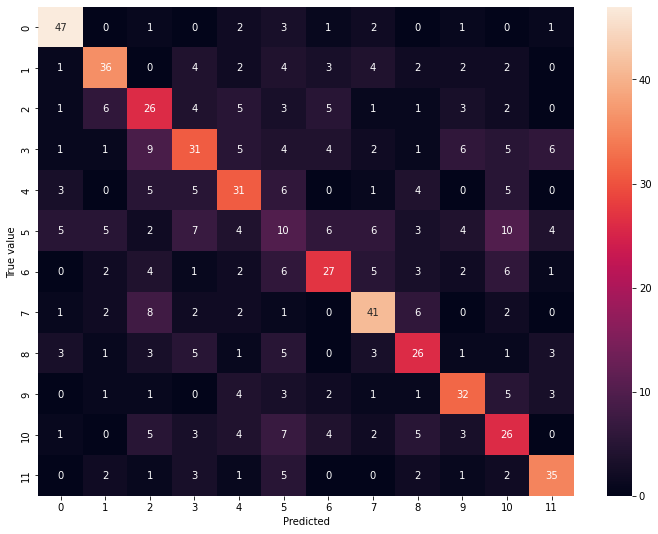

In [36]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (10,5) incorrect classifications represents how schizophrenia with depressive disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [37]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.75      0.81      0.78        58
           2       0.64      0.60      0.62        60
           3       0.40      0.46      0.43        57
           4       0.48      0.41      0.44        75
           5       0.49      0.52      0.50        60
           6       0.18      0.15      0.16        66
           7       0.52      0.46      0.49        59
           8       0.60      0.63      0.62        65
           9       0.48      0.50      0.49        52
          10       0.58      0.60      0.59        53
          11       0.39      0.43      0.41        60
          12       0.66      0.67      0.67        52

    accuracy                           0.51       717
   macro avg       0.51      0.52      0.52       717
weighted avg       0.51      0.51      0.51       717



In [38]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

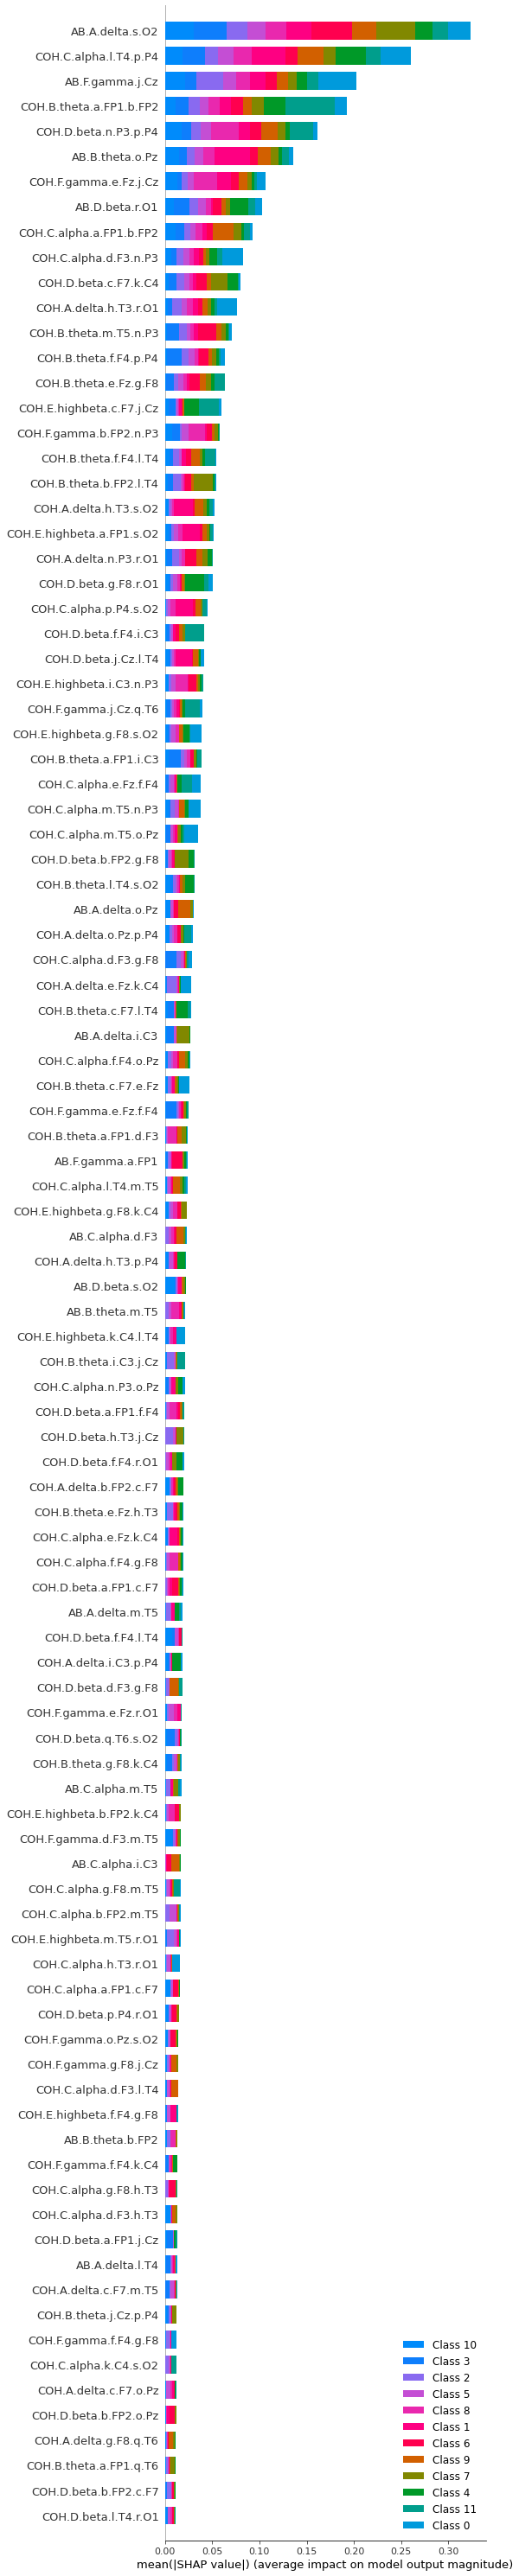

In [39]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 100)


In [42]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

,col_name,feature_importance_vals
18,AB.A.delta.s.O2,19.317022
602,COH.C.alpha.l.T4.p.P4,15.550616
104,AB.F.gamma.j.Cz,12.099405
285,COH.B.theta.a.FP1.b.FP2,11.515979
784,COH.D.beta.n.P3.p.P4,9.636296
...,...,...
204,COH.A.delta.f.F4.q.T6,0.000000
600,COH.C.alpha.l.T4.n.P3,0.000000
601,COH.C.alpha.l.T4.o.Pz,0.000000
203,COH.A.delta.f.F4.p.P4,0.000000


In [43]:
# Below I am retrieving the 100 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(10)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['AB.A.delta.s.O2',
 'COH.C.alpha.l.T4.p.P4',
 'AB.F.gamma.j.Cz',
 'COH.B.theta.a.FP1.b.FP2',
 'COH.D.beta.n.P3.p.P4',
 'AB.B.theta.o.Pz',
 'COH.F.gamma.e.Fz.j.Cz',
 'AB.D.beta.r.O1',
 'COH.C.alpha.a.FP1.b.FP2',
 'COH.C.alpha.d.F3.n.P3']

In [44]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

,AB.A.delta.s.O2,COH.C.alpha.l.T4.p.P4,AB.F.gamma.j.Cz,COH.B.theta.a.FP1.b.FP2,COH.D.beta.n.P3.p.P4,AB.B.theta.o.Pz,COH.F.gamma.e.Fz.j.Cz,AB.D.beta.r.O1,COH.C.alpha.a.FP1.b.FP2,COH.C.alpha.d.F3.n.P3
0,11.893948,25.948707,4.687539,84.738044,29.335667,14.208286,46.680293,18.690871,91.822146,23.708750
1,12.055957,36.338418,6.456111,87.083141,53.714415,10.562447,74.100406,43.236774,95.320950,44.411871
2,10.161765,29.967558,1.813874,77.140159,38.114306,56.294161,78.060585,13.025842,82.563586,9.827433
3,25.769522,66.952340,6.094846,62.238485,42.492365,34.922198,46.863267,30.601081,93.851009,47.707682
4,12.834485,56.099601,0.992237,83.356702,66.030355,10.437202,93.775845,6.841598,94.410869,53.116185
...,...,...,...,...,...,...,...,...,...,...
940,12.487389,43.484046,2.240360,68.800281,58.473811,8.063152,65.057135,36.203481,93.617570,18.382949
941,14.148625,99.765239,1.722965,89.057117,33.571883,8.708960,99.040213,6.604095,92.114902,31.237468
942,11.993932,52.624526,0.949449,99.680580,20.716813,9.983917,48.453237,7.667246,99.951620,35.857666
943,8.397872,26.253417,1.427683,99.614535,49.150144,10.888693,54.560291,8.098550,99.918925,36.601301


In [45]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [46]:
from sklearn import tree

# Importing the decision tree api and setting a default model with decision tree configurations.
model = tree.DecisionTreeClassifier(max_depth=59)

In [47]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=59)

In [48]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.14788732394366197

In [49]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([11,  6,  7,  6,  5,  2,  6,  6,  1, 10, 11,  3,  7,  3,  7,  6,  6,
       10,  6,  7, 10,  7,  6,  3,  6,  6,  6,  4,  4,  7,  3,  7,  6, 11,
       11,  6,  3,  7,  6,  3,  5,  3,  6,  6,  6,  6, 10,  6,  5,  6,  1,
        9,  2,  7,  4,  1,  9,  4,  1,  4,  3, 11,  6,  4,  8,  4,  3,  1,
        4, 10,  1,  4,  4,  6,  6,  3,  9,  6,  6,  3,  8,  7,  7, 10,  4,
        6,  1,  3,  9,  6,  6,  6,  8, 11,  6,  6,  6,  5,  3,  6, 11,  7,
       10,  3,  1,  8,  5,  3,  1,  7,  9,  7,  1,  4, 12,  4,  6,  6, 11,
       12,  6, 12,  7, 10,  9, 10,  6,  4, 12,  3,  6, 10,  4,  1,  8,  3,
        5, 12,  9,  4,  2,  6,  3,  4,  3,  6,  2,  6,  6,  6,  9, 11, 11,
        1, 11,  3, 11, 10,  9, 11,  1, 11,  3, 10, 11, 11,  5,  4,  5, 10,
        3,  5,  6,  5,  7,  4, 11, 12,  4,  9,  7,  6,  2,  7,  4,  7,  8,
        6,  4,  4,  5,  2,  4,  4,  6,  4,  6, 10,  3,  6,  6, 10,  6,  6,
        8,  3,  3,  4, 12, 10,  4,  7, 11, 12, 11,  5,  4,  4, 12, 10, 11,
        3,  4,  6,  2,  4

In [50]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 0,  1,  1,  1,  1,  4,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  3,  1,  0,  4,  2,  0,  1,  1,  1,  0],
       [ 1,  3,  4,  3,  1,  5,  4,  1,  0,  1,  2,  0],
       [ 1,  0,  5,  4,  2,  6,  1,  0,  1,  2,  2,  2],
       [ 4,  1,  1,  5,  0,  9,  3,  0,  1,  2,  2,  0],
       [ 2,  2,  7,  9,  4, 16,  5,  1,  2,  3,  5,  5],
       [ 1,  0,  2,  7,  0,  4,  5,  3,  4,  2,  3,  0],
       [ 2,  0,  0,  0,  1,  5,  0,  0,  0,  2,  2,  0],
       [ 1,  1,  1,  0,  1,  3,  3,  0,  4,  3,  2,  0],
       [ 0,  0,  1,  1,  1,  5,  0,  0,  0,  3,  0,  0],
       [ 2,  0,  4,  4,  2,  9,  2,  3,  1,  3,  3,  1],
       [ 0,  1,  2,  2,  2,  2,  1,  0,  0,  0,  1,  3]], dtype=int64)

Text(87.0, 0.5, 'True value')

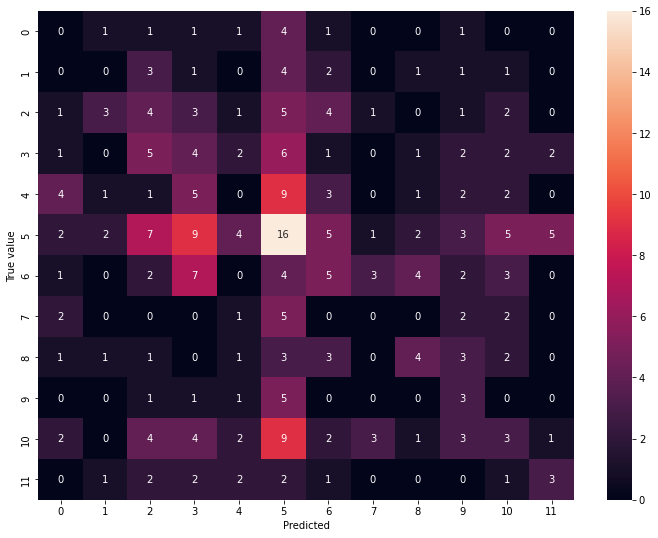

In [51]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,4) & (5,10) & (3,5) with 10,10,10 incorrect classifications represents how bipolar & schizophrenai & behavioural with depressive disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [52]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        13
           3       0.13      0.16      0.14        25
           4       0.11      0.15      0.13        26
           5       0.00      0.00      0.00        28
           6       0.22      0.26      0.24        61
           7       0.19      0.16      0.17        31
           8       0.00      0.00      0.00        12
           9       0.29      0.21      0.24        19
          10       0.13      0.27      0.18        11
          11       0.13      0.09      0.11        34
          12       0.27      0.21      0.24        14

    accuracy                           0.15       284
   macro avg       0.12      0.13      0.12       284
weighted avg       0.14      0.15      0.14       284



In [53]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html
# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html